In [20]:
import json
import matplotlib.pyplot as plt
import glob
import pandas as pd
import os
import numpy as np

results_path = './results/'
files = glob.glob(results_path + '*.json')
results = []

for file in files:
    with open(file) as f:
        filename = os.path.basename(file)
        splitted_filename = filename.split('_')
        graph = splitted_filename[0]
        algorithm = splitted_filename[1]
        timestamp = splitted_filename[3].split('.')[0] if len(splitted_filename) > 3 else ''
        content = json.load(f)
        content['graphId'] = graph
        content['algorithm'] = algorithm
        content['timestamp'] = timestamp
        results.append(content)

results = pd.DataFrame(results, columns=['graphId', 'algorithm', 'initializationTime', 'executionTime', 'totalTime', 'timestamp'])
results

,graphId,algorithm,initializationTime,executionTime,totalTime,timestamp
0,BVZ-tsukuba0,parallelbcsr,3.902400,3462.245605,3466.147949,20240919164321
1,BVZ-tsukuba0,parallelbcsr,3.949216,3490.045654,3493.994873,20240919165813
2,BVZ-tsukuba0,parallelbcsr,3.830784,3469.756592,3473.587402,20240919171305
3,BVZ-tsukuba0,parallelbcsr,5.522752,3482.340820,3487.863525,20240919172758
4,BVZ-tsukuba0,parallelbcsr,3.849280,3452.479492,3456.328613,20240919174251
...,...,...,...,...,...,...
365,graph9b,parallelbcsr,4.003584,90.923042,94.926620,20240919181043
366,graph9b,parallelbcsr,6.040608,96.186272,102.226883,20240919182536
367,graph9b,parallelbcsr,7.308992,97.723137,105.032127,20240919184030
368,graph9b,parallelbcsr,3.911264,79.679779,83.591042,20240919185523


In [21]:
agg_results = results.groupby(['graphId', 'algorithm']).agg({'initializationTime': ['mean', 'std', 'min', 'max'], 'executionTime': ['mean', 'std', 'min', 'max'], 'totalTime': ['mean', 'std', 'min', 'max']}).reset_index()
agg_results.columns = ['graphId', 'algorithm', 'initTime_mean', 'initTime_std', 'initTime_min', 'initTime_max', 'execTime_mean', 'execTime_std', 'execTime_min', 'execTime_max', 'totTime_mean', 'totTime_std', 'totTime_min', 'totTime_max']
agg_results

,graphId,algorithm,initTime_mean,initTime_std,initTime_min,initTime_max,execTime_mean,execTime_std,execTime_min,execTime_max,totTime_mean,totTime_std,totTime_min,totTime_max
0,BVZ-tsukuba0,parallelbcsr,4.186141,0.682606,3.811616,5.522752,3482.092358,20.713461,3452.479492,3511.156982,3486.278467,20.516554,3456.328613,3515.031982
1,BVZ-tsukuba1,parallelbcsr,4.785590,0.885523,3.691552,5.553856,3860.484106,336.037447,3522.368896,4610.088867,3865.269653,336.766790,3526.151367,4615.642578
2,BVZ-tsukuba2,parallelbcsr,4.640064,1.287152,3.680192,7.574784,3612.816528,14.106813,3591.346436,3631.435059,3617.456567,13.681795,3595.026611,3635.185303
3,BVZ-tsukuba3,parallelbcsr,3.794739,0.045439,3.701760,3.856992,3771.004419,15.902741,3749.855469,3798.112061,3774.799121,15.906087,3753.658691,3801.914307
4,graph1,parallel,0.147331,0.045732,0.099296,0.258944,0.369107,0.242398,0.205024,1.043360,0.516438,0.285507,0.310944,1.302304
5,graph1,parallelbcsr,0.125830,0.017123,0.108544,0.161952,1.799126,0.450429,1.280192,2.305856,1.924957,0.457335,1.388736,2.467808
6,graph1,serial,0.004500,0.003472,0.002000,0.011000,0.003800,0.002781,0.002000,0.009000,0.008800,0.006233,0.004000,0.021000
7,graph2,parallel,0.138317,0.018770,0.104832,0.161760,0.282317,0.048998,0.191040,0.330112,0.420634,0.065493,0.295872,0.477280
8,graph2,parallelbcsr,0.130205,0.014926,0.110048,0.159264,1.686426,0.306371,1.112288,1.919360,1.816630,0.307935,1.227040,2.029408
9,graph2,serial,0.004600,0.003534,0.002000,0.012000,0.006100,0.004533,0.003000,0.015000,0.011200,0.007983,0.006000,0.028000


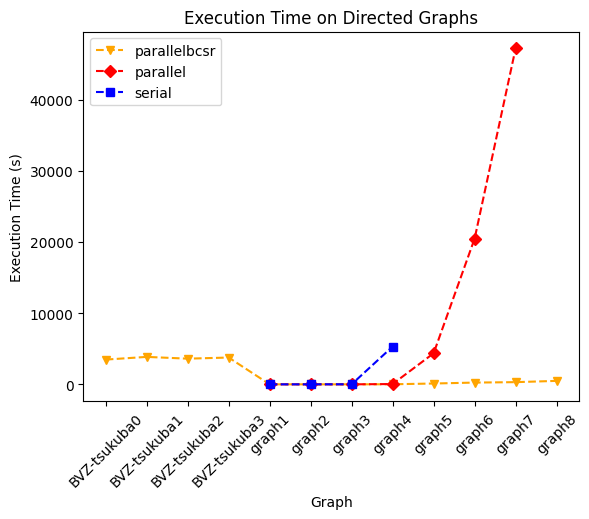

In [22]:
plot_style = {'serial': {'linestyle': 'dashed', 'color': 'blue', 'marker': 's'},
              'parallel': {'linestyle': 'dashed', 'color': 'red', 'marker': 'D'},
              'parallelbcsr': {'linestyle': 'dashed', 'color': 'orange', 'marker': 'v'}
              }

# Plot execution time for each algorithm on directed graphs (graphId not ends with 'b')
agg_results_directed = agg_results[~agg_results['graphId'].str.endswith('b')]

# Line plot
for algorithm in agg_results_directed['algorithm'].unique():
    data = agg_results_directed[agg_results_directed['algorithm'] == algorithm]
    plt.plot(data['graphId'], data['execTime_mean'], label=algorithm, linestyle=plot_style[algorithm]['linestyle'], color=plot_style[algorithm]['color'], marker=plot_style[algorithm]['marker'])
plt.xlabel('Graph')
plt.ylabel('Execution Time (s)')
plt.title('Execution Time on Directed Graphs')
plt.legend()
plt.xticks(rotation=45)
plt.show()

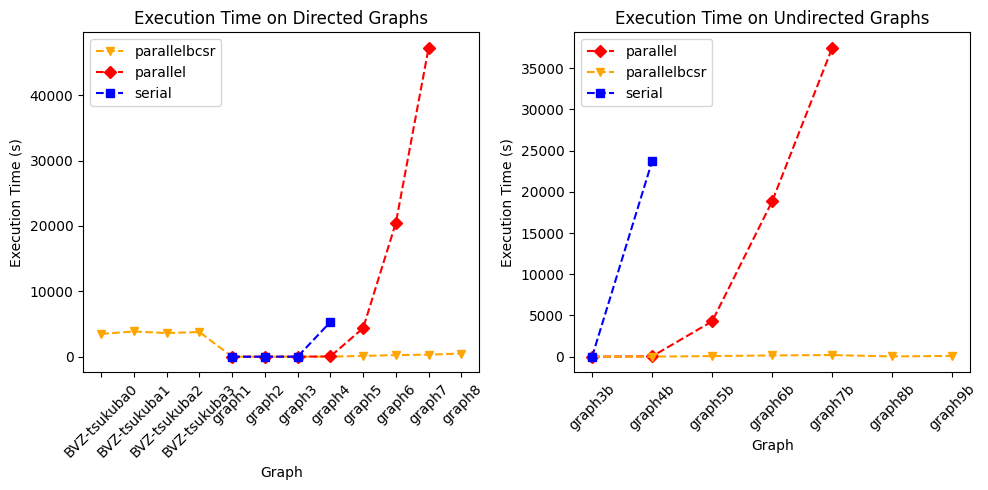

In [23]:
# Plot execution time for each algorithm on directed graphs (graphId not ends with 'b') and plot execution time for each algorithm on undirected graphs (graphId ends with 'b') 
agg_results_directed = agg_results[~agg_results['graphId'].str.endswith('b')]
agg_results_undirected = agg_results[agg_results['graphId'].str.endswith('b')]
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
for algorithm in agg_results_directed['algorithm'].unique():
    data = agg_results_directed[agg_results_directed['algorithm'] == algorithm]
    plt.plot(data['graphId'], data['execTime_mean'], label=algorithm, linestyle=plot_style[algorithm]['linestyle'], color=plot_style[algorithm]['color'], marker=plot_style[algorithm]['marker'])
plt.xlabel('Graph')
plt.ylabel('Execution Time (s)')
plt.title('Execution Time on Directed Graphs')
plt.legend()
plt.xticks(rotation=45)
plt.subplot(1, 2, 2)
for algorithm in agg_results_undirected['algorithm'].unique():
    data = agg_results_undirected[agg_results_undirected['algorithm'] == algorithm]
    plt.plot(data['graphId'], data['execTime_mean'], label=algorithm, linestyle=plot_style[algorithm]['linestyle'], color=plot_style[algorithm]['color'], marker=plot_style[algorithm]['marker'])
plt.xlabel('Graph')
plt.ylabel('Execution Time (s)')
plt.title('Execution Time on Undirected Graphs')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


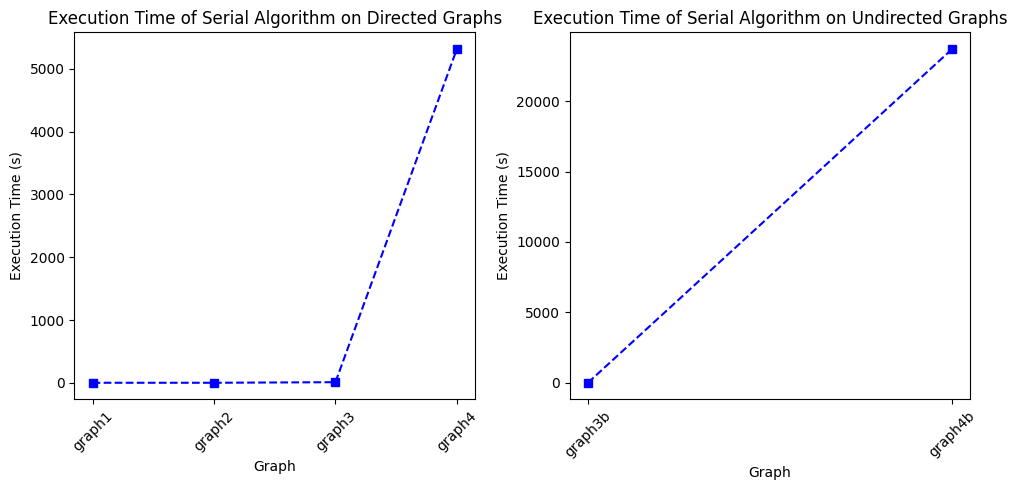

In [39]:
# Plot execution time of serial algorithm for directed and undirected graphs separately
agg_results_directed = agg_results[(agg_results['algorithm'] == 'serial') & (~agg_results['graphId'].str.endswith('b'))]
agg_results_undirected = agg_results[(agg_results['algorithm'] == 'serial') & (agg_results['graphId'].str.endswith('b'))]
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(agg_results_directed['graphId'], agg_results_directed['execTime_mean'], label='serial', linestyle=plot_style['serial']['linestyle'], color=plot_style['serial']['color'], marker=plot_style['serial']['marker'])
plt.xlabel('Graph')
plt.ylabel('Execution Time (s)')
plt.title('Execution Time of Serial Algorithm on Directed Graphs')
plt.xticks(rotation=45)
plt.subplot(1, 2, 2)
plt.plot(agg_results_undirected['graphId'], agg_results_undirected['execTime_mean'], label='serial', linestyle=plot_style['serial']['linestyle'], color=plot_style['serial']['color'], marker=plot_style['serial']['marker'])
plt.xlabel('Graph')
plt.ylabel('Execution Time (s)')
plt.title('Execution Time of Serial Algorithm on Undirected Graphs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

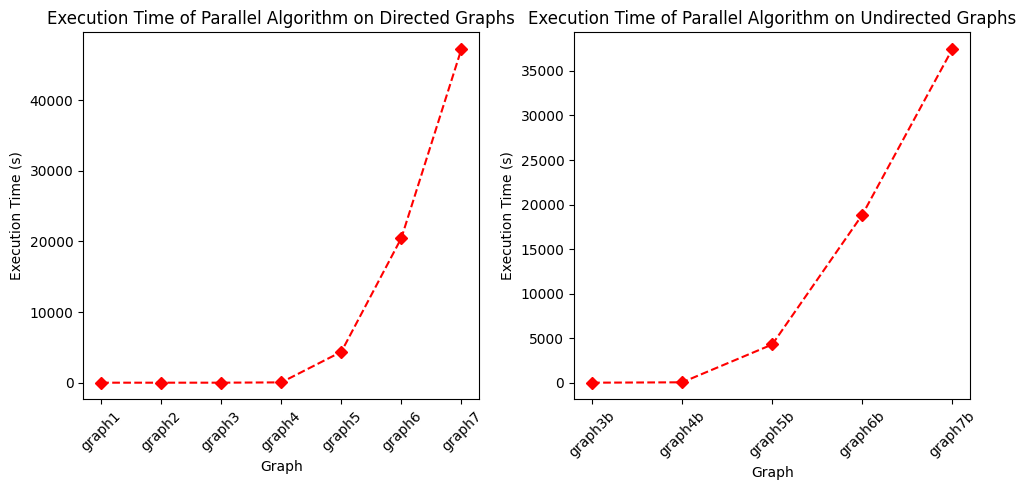

In [40]:
# Plot execution time of parallel algorithm for directed and undirected graphs separately
agg_results_directed = agg_results[(agg_results['algorithm'] == 'parallel') & (~agg_results['graphId'].str.endswith('b'))]
agg_results_undirected = agg_results[(agg_results['algorithm'] == 'parallel') & (agg_results['graphId'].str.endswith('b'))]
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(agg_results_directed['graphId'], agg_results_directed['execTime_mean'], label='parallel', linestyle=plot_style['parallel']['linestyle'], color=plot_style['parallel']['color'], marker=plot_style['parallel']['marker'])
plt.xlabel('Graph')
plt.ylabel('Execution Time (s)')
plt.title('Execution Time of Parallel Algorithm on Directed Graphs')
plt.xticks(rotation=45)
plt.subplot(1, 2, 2)
plt.plot(agg_results_undirected['graphId'], agg_results_undirected['execTime_mean'], label='parallel', linestyle=plot_style['parallel']['linestyle'], color=plot_style['parallel']['color'], marker=plot_style['parallel']['marker'])
plt.xlabel('Graph')
plt.ylabel('Execution Time (s)')
plt.title('Execution Time of Parallel Algorithm on Undirected Graphs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

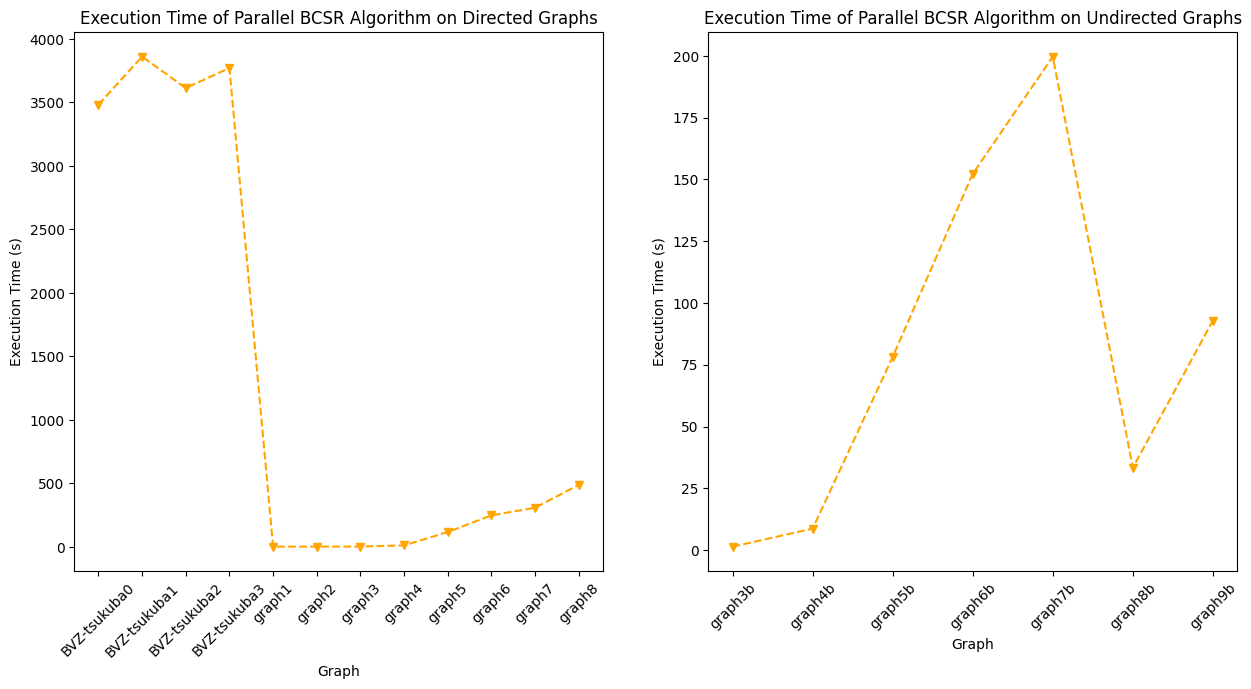

In [41]:
# Plot execution time of parallelbcsr algorithm for directed and undirected graphs separately
agg_results_directed = agg_results[(agg_results['algorithm'] == 'parallelbcsr') & (~agg_results['graphId'].str.endswith('b'))]
agg_results_undirected = agg_results[(agg_results['algorithm'] == 'parallelbcsr') & (agg_results['graphId'].str.endswith('b'))]
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
plt.plot(agg_results_directed['graphId'], agg_results_directed['execTime_mean'], label='parallelbcsr', linestyle=plot_style['parallelbcsr']['linestyle'], color=plot_style['parallelbcsr']['color'], marker=plot_style['parallelbcsr']['marker'])
plt.xlabel('Graph')
plt.ylabel('Execution Time (s)')
plt.title('Execution Time of Parallel BCSR Algorithm on Directed Graphs')
plt.xticks(rotation=45)
plt.subplot(1, 2, 2)
plt.plot(agg_results_undirected['graphId'], agg_results_undirected['execTime_mean'], label='parallelbcsr', linestyle=plot_style['parallelbcsr']['linestyle'], color=plot_style['parallelbcsr']['color'], marker=plot_style['parallelbcsr']['marker'])
plt.xlabel('Graph')
plt.ylabel('Execution Time (s)')
plt.title('Execution Time of Parallel BCSR Algorithm on Undirected Graphs')
plt.xticks(rotation=45)
plt.show()